In [1]:
import sympy as sp
import numpy as np
from IPython.display import display, Math, HTML
import random
import os, sys
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
directoryPath = os.path.abspath(os.path.join('..\\libs'))

if directoryPath not in sys.path:
    sys.path.append(directoryPath)

In [3]:
from PythonStorybookLibs.Math.icons import mapMatrixToIcons, mapNumberToIcons
import PythonStorybookLibs.Math.numbers as mathNumbers
from PythonStorybookLibs.output.html import TableHtml
from PythonStorybookLibs.tuition.assessments.assessment_factory import AssessmentFactory

### Icons

In [4]:
icons = {
    0: '🎲',
    1: '🚗',
    2: '🦢',
    3: '🍺',
    4: '🛫',
    5: '🎒',
    6: '👿',
    7: '⛪',
    8: '🎱',
    9: '💍',
}

print(icons)

{0: '🎲', 1: '🚗', 2: '🦢', 3: '🍺', 4: '🛫', 5: '🎒', 6: '👿', 7: '⛪', 8: '🎱', 9: '💍'}


### Table

#### Matrix

In [5]:
def getAdditionTable(flipHorizontally: bool = True):
    size = 10
    A = np.zeros([size, size], int)

    for row in range(size):
        for column in range(size):
            if row == 0:
                A[row, column] = column
                continue
            if column == 0:
                A[row, column] = row
                continue

            if row <= column:
                A[row, column] = row + column
    
    return np.flip(A, 0) if flipHorizontally else A

In [6]:
A = getAdditionTable()

display(Math(sp.latex(sp.sympify(A))))

<IPython.core.display.Math object>

#### Colors

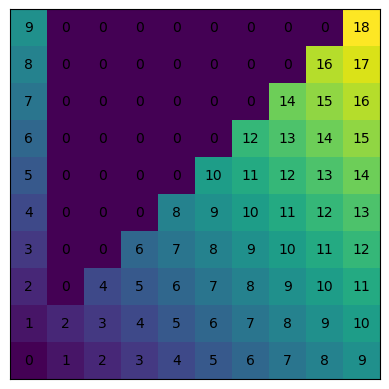

In [7]:
xLength, yLength = np.shape(A)

plt.imshow(A)

for i in range(xLength):
    for j in range(yLength):
        plt.text(j, i, A[i, j], horizontalalignment='center', verticalalignment='center')

plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.show()

#### Icons

In [8]:
iconsTable = mapMatrixToIcons(A, icons)

display(HTML(TableHtml.toHtml(iconsTable)))

💍,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🚗🎱
🎱,🎲,🎲,🎲,🎲,🎲,🎲,🎲,🚗👿,🚗⛪
⛪,🎲,🎲,🎲,🎲,🎲,🎲,🚗🛫,🚗🎒,🚗👿
👿,🎲,🎲,🎲,🎲,🎲,🚗🦢,🚗🍺,🚗🛫,🚗🎒
🎒,🎲,🎲,🎲,🎲,🚗🎲,🚗🚗,🚗🦢,🚗🍺,🚗🛫
🛫,🎲,🎲,🎲,🎱,💍,🚗🎲,🚗🚗,🚗🦢,🚗🍺
🍺,🎲,🎲,👿,⛪,🎱,💍,🚗🎲,🚗🚗,🚗🦢
🦢,🎲,🛫,🎒,👿,⛪,🎱,💍,🚗🎲,🚗🚗
🚗,🦢,🍺,🛫,🎒,👿,⛪,🎱,💍,🚗🎲
🎲,🚗,🦢,🍺,🛫,🎒,👿,⛪,🎱,💍


### Terms variation

#### Dictionary

In [9]:
def getAdditionDictionary():
    size = 10
    dictionary = { key: [] for key in range(1, (size + size)) }
    
    for key in dictionary:
        number = int(key)
        terms = mathNumbers.getTerms(number)
        dictionary[key].extend(terms)
    
    return dictionary

In [10]:
additionDictionary = getAdditionDictionary()

print(additionDictionary)

{1: [], 2: [(1, 1)], 3: [(1, 2)], 4: [(1, 3), (2, 2)], 5: [(1, 4), (2, 3)], 6: [(1, 5), (2, 4), (3, 3)], 7: [(1, 6), (2, 5), (3, 4)], 8: [(1, 7), (2, 6), (3, 5), (4, 4)], 9: [(1, 8), (2, 7), (3, 6), (4, 5)], 10: [(1, 9), (2, 8), (3, 7), (4, 6), (5, 5)], 11: [(2, 9), (3, 8), (4, 7), (5, 6)], 12: [(3, 9), (4, 8), (5, 7), (6, 6)], 13: [(4, 9), (5, 8), (6, 7)], 14: [(5, 9), (6, 8), (7, 7)], 15: [(6, 9), (7, 8)], 16: [(7, 9), (8, 8)], 17: [(8, 9)], 18: [(9, 9)], 19: []}


#### Table

In [11]:
def dictionaryToMatrix(dictionary, inverseVertically: bool = False):
    keys = list(dictionary.keys())
    sizeX = reduce(lambda acc, terms: acc if acc >= len(terms) else len(terms), dictionary.values(), 0)
    sizeY = len(keys)
    D = np.zeros([sizeY, sizeX], int)

    if inverseVertically:
        keys.reverse()
        
    for i, key in enumerate(keys):
        for j, column in enumerate(dictionary[key]):
            D[i, j] = reduce(lambda term1, term2: str(term1) + str(term2), column)
    
    D = np.insert(D, 0, keys, axis=1)
    
    return D

In [12]:
D = dictionaryToMatrix(additionDictionary)

display(Math(sp.latex(sp.sympify(D))))

<IPython.core.display.Math object>

#### Colors

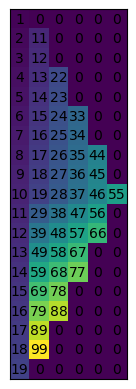

In [13]:
xLength, yLength = np.shape(D)

plt.imshow(D)

for i in range(xLength):
    for j in range(yLength):
        plt.text(j, i, D[i, j], horizontalalignment='center', verticalalignment='center')
        
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

plt.show()

#### Icons

In [14]:
iconsTable = mapMatrixToIcons(D, icons)

display(HTML(TableHtml.toHtml(iconsTable)))

🚗,🎲,🎲,🎲,🎲,🎲
🦢,🚗🚗,🎲,🎲,🎲,🎲
🍺,🚗🦢,🎲,🎲,🎲,🎲
🛫,🚗🍺,🦢🦢,🎲,🎲,🎲
🎒,🚗🛫,🦢🍺,🎲,🎲,🎲
👿,🚗🎒,🦢🛫,🍺🍺,🎲,🎲
⛪,🚗👿,🦢🎒,🍺🛫,🎲,🎲
🎱,🚗⛪,🦢👿,🍺🎒,🛫🛫,🎲
💍,🚗🎱,🦢⛪,🍺👿,🛫🎒,🎲
🚗🎲,🚗💍,🦢🎱,🍺⛪,🛫👿,🎒🎒
🚗🚗,🦢💍,🍺🎱,🛫⛪,🎒👿,🎲


### Tests

In [15]:
numbers = [*range(1, 10)]
count = 10
numbersAndQuestions = []

for _ in range(count):
    x = random.choice(numbers)
    y = random.choice(numbers)
    question = "What is the result of %s + %s: " % (mapNumberToIcons(x, icons), mapNumberToIcons(y, icons))
    
    numbersAndQuestions.append((x, y, question))

assessment = AssessmentFactory.createAdditionAssessment(numbersAndQuestions)

assessment.start()

What is the result of ⛪ + 🚗: 8
Correct
What is the result of 🛫 + 🍺: 7
Correct
What is the result of 🦢 + 💍: 11
Correct
What is the result of 👿 + 🚗: 8
Wrong
What is the result of 💍 + 🍺: 12
Correct
What is the result of 🎱 + 🎒: 13
Correct
What is the result of 🎱 + 💍: 17
Correct
What is the result of 🎒 + 🦢: 7
Correct
What is the result of 🦢 + 💍: 11
Correct
What is the result of 💍 + 💍: 18
Correct


False